In [4]:
from  sklearn.datasets import make_classification

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
X, y = make_classification(n_samples=2000,n_features=20,n_classes=2)

In [8]:
X.shape

(2000, 20)

In [9]:
y.shape

(2000,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [16]:
############ LOGISTIC REGRESSION #################
lm = LogisticRegression()
lm.fit(X_train,y_train)
pred_y = lm.predict(X_test)
y_proba = lm.predict_proba(X_test)

In [46]:
##### KNN ################
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred_y1 = knn.predict(X_test)
y_proba1 = knn.predict_proba(X_test)

In [27]:
from sklearn.metrics import roc_curve

In [47]:
fpr,tpr,threshold = roc_curve(y_test,y_proba[:,1])
fpr1,tpr1,threshold1 = roc_curve(y_test,y_proba1[:,1])

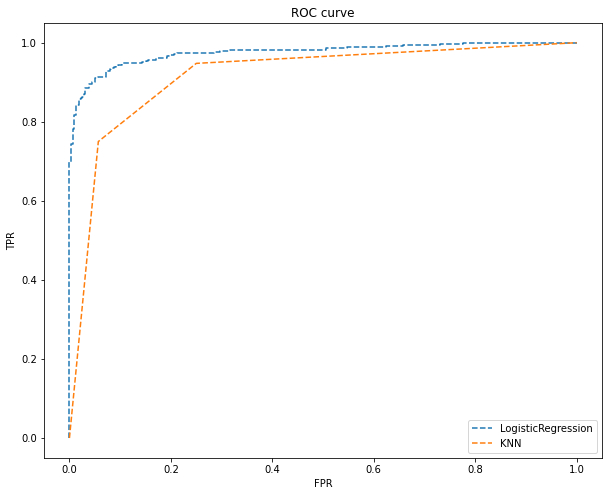

In [84]:
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,linestyle='--', label ='LogisticRegression')
plt.plot(fpr1,tpr1,linestyle='--', label ='KNN')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

In [83]:
logit_score = roc_auc_score(y_test,y_proba[:,1])
print("Logistic Regression - ROC AUC SCORE:",logit_score)
knn_score = roc_auc_score(y_test,y_proba1[:,1])
print("KNN Classifier - ROC AUC SCORE:",knn_score)

Logistic Regression - ROC AUC SCORE: 0.97533669414189
KNN Classifier - ROC AUC SCORE: 0.9155964821901679


CONCLUSION: Logistic regression performs better than KNN.

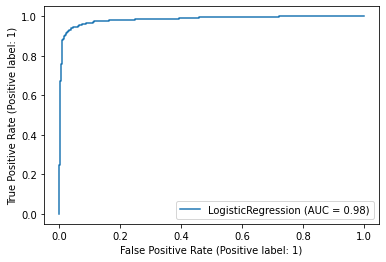

In [58]:
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(estimator=lm, X= X_train,y=y_train)

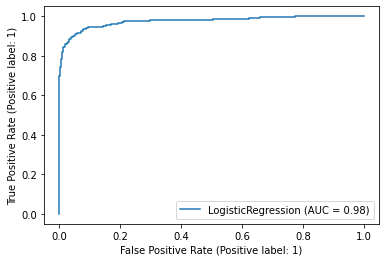

In [59]:
plot_roc_curve(estimator=lm, X= X_test,y=y_test)

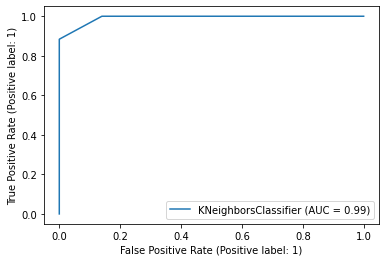

In [60]:
plot_roc_curve(estimator=knn, X= X_train,y=y_train)

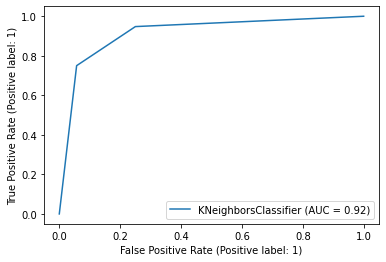

In [61]:
plot_roc_curve(estimator=knn, X= X_test,y=y_test)

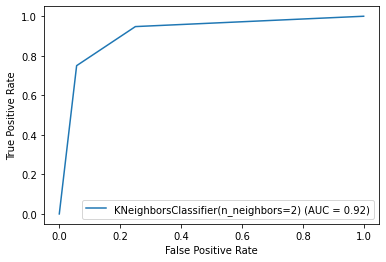

In [73]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
roc_auc = auc(fpr1, tpr1) #------ auc of KNN 
display = RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc,estimator_name=knn)
display.plot()

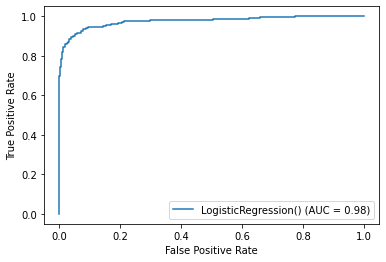

In [72]:
roc_auc = auc(fpr, tpr) #------ auc of Logit 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=lm)
display.plot()